In [139]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

df = pd.read_csv(r'/Users/davidsolnicki/Documents/movies.csv')


In [6]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [141]:
# Find percent of missing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [10]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [143]:
# Remove unnecessary decimals

df['budget'] = df['budget'].fillna(0).astype('int64')
df['votes'] = df['votes'].fillna(0).astype('int64')
df['gross'] = df['gross'].fillna(0).astype('int64')

In [43]:
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0,1980
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0,1980
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0,1980
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0,1981
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0,1980


In [145]:
# Create correct year column

df['yearcorrect'] = df['released'].str.extract(r',\s*(.{4})')

In [147]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [149]:
pd.set_option('display.max_rows', None)

In [151]:
# Drop duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3698                              Zentropa Entertainments
1175                                 Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

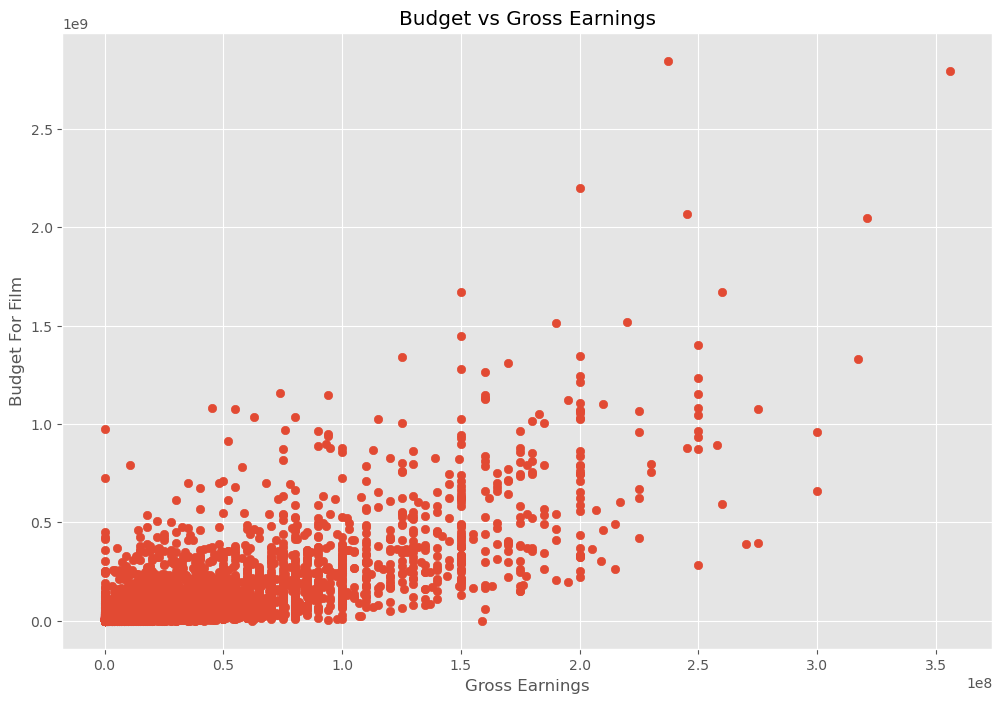

In [153]:
# Checking correlation
# Scatter plot budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget For Film')
plt.show()

Text(0, 0.5, 'Budget For Film')

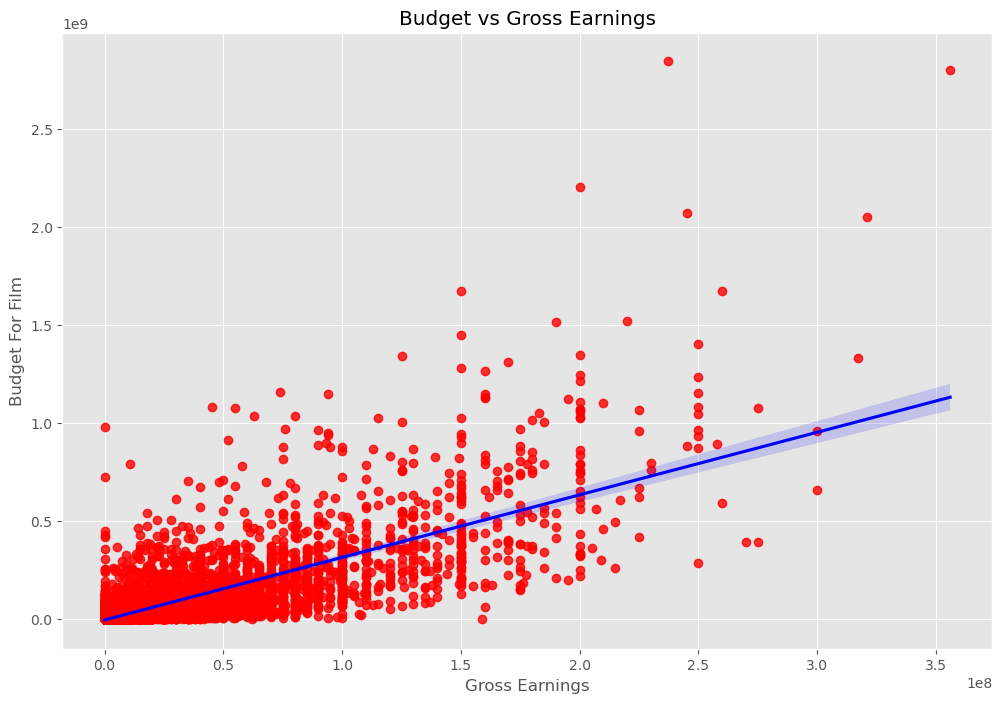

In [123]:
#Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget For Film')

In [155]:
df.corr(numeric_only= True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222427,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222427,0.409182,1.000000,0.486931,0.632870,0.309122
budget,0.309212,0.055665,0.486931,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632870,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309122,0.269510,0.245235,1.000000


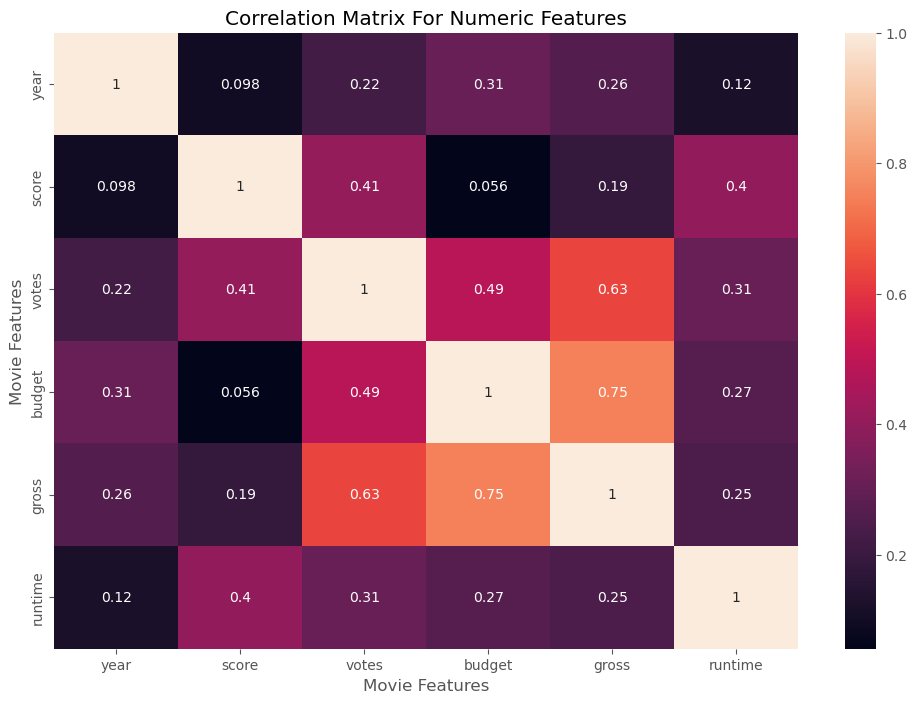

In [157]:
#Correlation matrix heat map

correlation_matrix = df.corr(numeric_only= True)

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix For Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [169]:
#Correlation matrix chart

correlation_mat = correlation_mat = df.corr(numeric_only=True)

corr_pairs = correlation_mat.unstack()

corr_pairs

gross    budget     0.750157
         votes      0.632870
budget   votes      0.486931
score    votes      0.409182
runtime  score      0.399451
year     budget     0.309212
runtime  votes      0.309122
budget   runtime    0.269510
year     gross      0.261900
runtime  gross      0.245235
votes    year       0.222427
score    gross      0.186392
year     runtime    0.120811
         score      0.097995
score    budget     0.055665
dtype: float64

In [173]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

score    budget     0.055665
budget   score      0.055665
year     score      0.097995
score    year       0.097995
year     runtime    0.120811
runtime  year       0.120811
gross    score      0.186392
score    gross      0.186392
year     votes      0.222427
votes    year       0.222427
gross    runtime    0.245235
runtime  gross      0.245235
year     gross      0.261900
gross    year       0.261900
runtime  budget     0.269510
budget   runtime    0.269510
votes    runtime    0.309122
runtime  votes      0.309122
budget   year       0.309212
year     budget     0.309212
runtime  score      0.399451
score    runtime    0.399451
votes    score      0.409182
score    votes      0.409182
votes    budget     0.486931
budget   votes      0.486931
gross    votes      0.632870
votes    gross      0.632870
budget   gross      0.750157
gross    budget     0.750157
year     year       1.000000
budget   budget     1.000000
votes    votes      1.000000
score    score      1.000000
gross    gross

In [185]:
# Keep only correlations above 0.5 and remove self correlations

sorted_pairs = corr_pairs.abs().sort_values(ascending=False)

sorted_pairs = sorted_pairs[sorted_pairs != 1]

sorted_pairs = sorted_pairs.drop_duplicates()

high_corr = sorted_pairs[(sorted_pairs > 0.5) & (sorted_pairs < 1)]

print(high_corr)

gross  budget    0.750157
       votes     0.632870
dtype: float64
